In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data
df = pd.read_csv('CarPrice_Assignment.csv')
df = df.drop(['car_ID','CarName','fuelsystem'],axis='columns')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
dummies = []
d_names = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber']
for n in d_names:
    dummies.append(pd.get_dummies(df[n]))
dummies.append(df.drop(d_names,axis='columns'))
df = pd.concat(dummies,axis='columns')
df.head()

,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,True,True,False,False,True,True,False,False,False,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,False,True,True,False,False,True,True,False,False,False,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,False,True,True,False,False,True,False,False,True,False,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,False,True,True,False,True,False,False,False,False,True,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,False,True,True,False,True,False,False,False,False,True,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diesel            205 non-null    bool   
 1   gas               205 non-null    bool   
 2   std               205 non-null    bool   
 3   turbo             205 non-null    bool   
 4   four              205 non-null    bool   
 5   two               205 non-null    bool   
 6   convertible       205 non-null    bool   
 7   hardtop           205 non-null    bool   
 8   hatchback         205 non-null    bool   
 9   sedan             205 non-null    bool   
 10  wagon             205 non-null    bool   
 11  4wd               205 non-null    bool   
 12  fwd               205 non-null    bool   
 13  rwd               205 non-null    bool   
 14  front             205 non-null    bool   
 15  rear              205 non-null    bool   
 16  dohc              205 non-null    bool   
 1

In [37]:
X = df.drop('price',axis='columns')
y = df['price']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 1576.1049094854077
MAPE = 0.11285102153995043


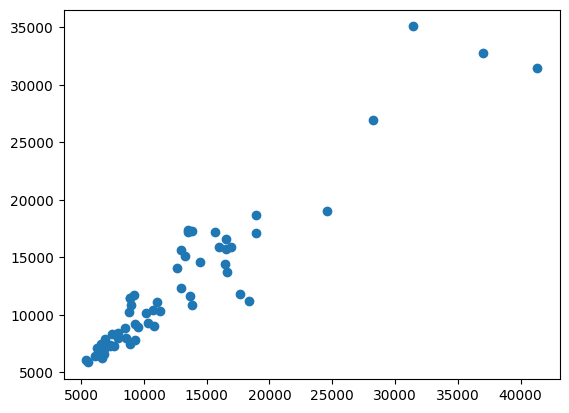

In [39]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print("*** Random Forest ***")
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()



*** KNN Regression ***
MAE = 1938.9973118279572
MAPE = 0.13168526374146158


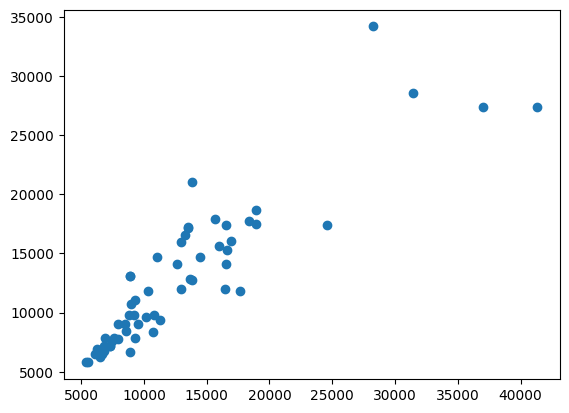

In [40]:
print("*** KNN Regression ***")
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [41]:
print("*** Linear Regression ***")
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))

*** Linear Regression ***
MAE = 1987.804183467742
MAPE = 0.14261440558357774


In [42]:
X_train.shape[1]

44

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Input

input_shape = (X_train.shape[1],)
model = Sequential([
Input(shape=input_shape),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(1, activation="linear")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,701 (57.43 KB)

 Trainable params: 14,701 (57.43 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from keras.callbacks import EarlyStopping
model.compile(loss='mse', optimizer='adam')
es = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)#, callbacks=[es])


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 243448864.0000 - val_loss: 238307696.0000
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 203804160.0000 - val_loss: 220567264.0000
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 221024592.0000 - val_loss: 203204416.0000
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 180192608.0000 - val_loss: 186343008.0000
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 163955936.0000 - val_loss: 169264272.0000
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 145631072.0000 - val_loss: 151723456.0000
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 117746144.0000 - val_loss: 134504256.0000
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 113486752.0000 - val_loss: 117966496.0000
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124221296.0000 - val_loss: 102517224.0000
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 76360912.0000 - val_loss: 89686904.0000
Epoch 11

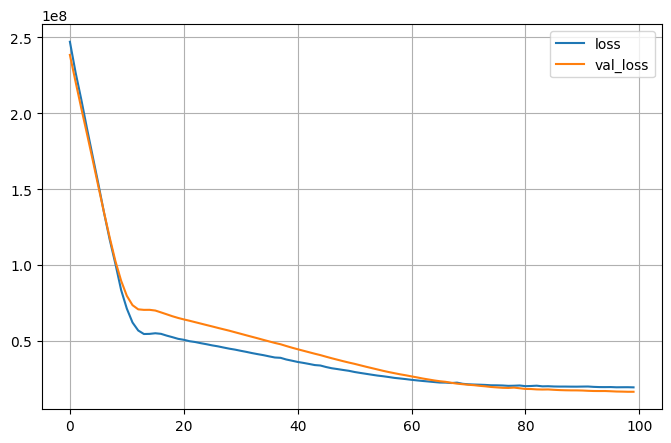

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [46]:
y_pred = model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE = 2948.6060436617945
MAPE = 0.21378236774312823
